In [11]:
import torch, torch_geometric
from src import graph_initialization
import networkx as nx
from torch_geometric.nn import GCNConv,Sequential,PositionalEncoding
from torch import nn


In [12]:
converter=graph_initialization.text_to_graph()
batches=converter(["Hello world! good i saw you", "How are you?"])

type(batches)

torch_geometric.data.batch.DataBatch

In [13]:
data=batches.get_example(0)
x=data.x
print(x.shape)
s,f=data['edge_index']
f[s==0]
print(f[s==0])
torch.index_select(x,0,f[s==0]).shape

torch.Size([9])
tensor([1, 5, 7, 8])


torch.Size([4])

In [7]:
data.edge_index.dtype

torch.int64

In [8]:
sequence_length=130
torch.randint(0,sequence_length,(2,sequence_length)).dtype


torch.int64

In [4]:
#x=torch.rand([4,8]).float()
#p_encoding=PositionalEncoding(10)
#print(x.shape,p_encoding(x).shape)
#.einsum(x,p_encoding(x),'c l, l c -> c l')

embedding_f=embedding.InputEmbedding()

x=embedding_f(x)

x.shape


torch.Size([9, 512])

In [6]:


#x=torch.rand([4,8]).float()
#p_encoding=PositionalEncoding(10)
#print(x.shape,p_encoding(x).shape)
#.einsum(x,p_encoding(x),'c l, l c -> c l')

embedding_f=embedding.InputEmbedding()

x=embedding_f(x)

RuntimeError: mat1 and mat2 shapes cannot be multiplied (4x8 and 1x2048)

In [6]:
x.shape

torch.Size([4, 8, 512])

In [6]:
x=torch.rand([10,1,7])
lin=nn.Sequential(nn.Conv1d(1,5,1),nn.ReLU(),nn.Conv1d(5,20,1))
lin(x).shape


torch.Size([10, 20, 7])

# simple graph example

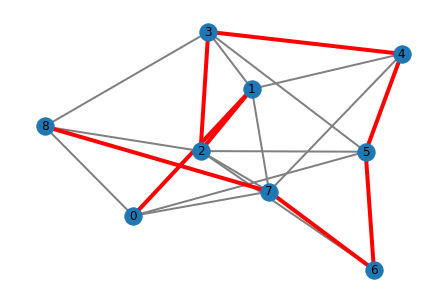

In [14]:
g = torch_geometric.utils.to_networkx(data, to_undirected=True)
colors= ['red' if edge[0]==edge[1]-1 else 'grey' for edge in g.edges()]
width= [4 if edge[0]==edge[1]-1 else 2 for edge in g.edges()]
nx.draw(g,edge_color=colors, width=width, with_labels=True)

#update_f=GraphCNN(features)

In [126]:
type(data)

torch_geometric.data.data.Data

In [12]:
type(data)

torch_geometric.data.data.Data

In [4]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")

In [7]:
tokens=tokenizer(["Hello world! good i saw you", "How are you?"])
tokens['input_ids']

[[101, 8667, 1362, 106, 1363, 178, 1486, 1128, 102],
 [101, 1731, 1132, 1128, 136, 102]]

In [119]:
tokens,mask=tokens['input_ids'],tokens['attention_mask']

ValueError: expected sequence of length 9 at dim 1 (got 6)

In [117]:
for i in range(len(tokens)):
    limit=sum(mask[i])
    tokens[i]=torch.tensor(tokens[i][:limit])
tokens

[tensor([ 101, 8667, 1362,  106, 1363,  178, 1486, 1128,  102]),
 tensor([ 101, 1731, 1132, 1128,  136,  102])]

In [64]:
a=torch.tensor([[1,2,6],[4,1,6]])
b=torch.tensor([[0,1,0],[1,0,1]]).bool()

a[0]=a[0,:-1]
#for i in range(a.shape[0]):
    #a[i]=a[i][b[i]]
a

RuntimeError: The expanded size of the tensor (3) must match the existing size (2) at non-singleton dimension 0.  Target sizes: [3].  Tensor sizes: [2]

In [58]:
print(type(tokenizer))

<class 'transformers.models.bert.tokenization_bert_fast.BertTokenizerFast'>


In [132]:
class text_to_graph():

    def __init__(self,
                tokenizer=AutoTokenizer.from_pretrained("bert-base-cased"),
                seq_to_graph=graphCA.sequence_to_random_graph):
                
        self.tokenizer=tokenizer
        self.seq_to_graph=seq_to_graph
    
    def __call__(self,text:list)->torch.Tensor:

        tokens=self.tokenizer(text)['input_ids']
        graphs= [self.seq_to_graph(torch.tensor(token)) for token in tokens]
        
        return torch_geometric.data.Batch.from_data_list(graphs)


In [149]:
batches.get_example(1)

Data(x=[6], edge_index=[2, 28])

In [33]:
from transformers import AutoTokenizer
from torch import nn

import torch
tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")

tokenizer.vocab_size

soft=nn.Softmax(dim=0)

x=torch.randint(0,tokenizer.vocab_size,(30,))
#x=torch.zeros(tokenizer.vocab_size,dtype=torch.int64)
#x[tokenizer.convert_tokens_to_ids('hello')]=1

#print(x.argmax(-1))

#tokenizer.decode(x.argmax(-1))

In [34]:
#x=tokenizer('hello, my name is mario and i am a student of the university of pisa')
#x=torch.tensor(x.input_ids)

tokenizer.decode(x)

'##nitz accredited 47 seal spiritual calmed edge Gladys Jesse barrel Wharton seventy kilometre diggingED Graves unitز Cove root mentioning advisors hollow Forbes swampsmana hydraulic yourself lights 10th'

In [96]:
embedder=nn.Embedding(tokenizer.vocab_size, 10)

wrong=torch.randint(0,tokenizer.vocab_size,(10,))

embedder(torch.LongTensor(wrong))

tensor([[ 1.2429, -0.0791, -1.3673,  3.0862,  0.5971,  1.1213, -0.0476,  0.2080,
          0.0506, -0.1567],
        [ 0.7337, -0.1819,  0.6446,  1.4200, -0.2561, -0.5500, -0.2452,  1.1052,
          0.6231, -0.7042],
        [-0.2660,  0.7935, -0.8020,  0.4084,  0.2517,  1.0196,  0.2395,  0.2871,
          0.8564,  1.0852],
        [-1.3913,  0.6498,  1.4138,  0.9503,  0.6939, -0.6378,  0.6805,  0.3524,
         -0.6895, -1.4748],
        [-0.5312, -0.6795, -0.4954, -1.0702, -0.6393,  0.6402, -0.0488, -0.8771,
          1.6097, -0.0270],
        [ 1.6466,  0.0937, -0.4621, -0.2226,  1.5756,  0.6441, -1.6695,  1.0333,
         -0.4243, -0.4896],
        [-0.5503,  0.1624, -1.3630,  0.1604, -0.0713, -0.7664,  1.6022,  0.4214,
         -0.9629, -0.1106],
        [ 0.0508, -0.8263,  0.3648,  0.4758,  0.0108,  0.2681, -1.5340,  1.2870,
          0.4424,  2.1983],
        [-0.1866, -0.6063,  1.5098, -0.7404,  0.6900, -0.7136,  0.5585, -0.2882,
         -0.8157,  1.7241],
        [-0.1722,  

In [4]:
import torch
a=torch.rand([3,2])
b=torch.rand([3])

b*a

RuntimeError: The size of tensor a (3) must match the size of tensor b (2) at non-singleton dimension 1

In [30]:
import einops
import torch

sequence_length=130

embedding_dim=17
embedding_dim_V=21
senquence_length=13

Q= torch.rand([sequence_length,embedding_dim])
K= torch.rand([sequence_length,embedding_dim])
V= torch.rand([sequence_length,embedding_dim_V])

edge_index=torch.randint(0,sequence_length,(sequence_length*3,2))

senders,recievers=edge_index

soft=nn.Softmax(dim=-1)

In [31]:
edge_index.t()

def phi(K,Q,V,recievers,senders):

    att=(Q[recievers]*K[senders]).sum(dim=-1) #TODO: add multi-head attention

    att=torch.exp(att)

    softmax=Tensor.index_add_()

    return einops.einsum(att,V[edge_index[:,1]],'..., ... c -> ... c')

In [33]:
phi(K,Q,V,edge_index).shape

torch.Size([390])


torch.Size([390, 21])

In [39]:
x=torch.rand([8,2])

tensor([[[0.7456, 0.3736],
         [0.1202, 0.1889],
         [0.1202, 0.1889]],

        [[0.7456, 0.3736],
         [0.7456, 0.3736],
         [0.9716, 0.6426]]])

In [1]:
import torch

from src.graph_initialization import batch_graphs
nodes1=torch.rand([4,5])
nodes2=torch.rand([3,5])

edge1=torch.randint(0,4,(2,8))
edge2=torch.randint(0,3,(2,3))

print(edge2)
nodes,edges=batch_graphs([nodes1,nodes2],[edge1,edge2])
edges

tensor([[0, 0, 1],
        [0, 0, 1]])


tensor([[0, 2, 3, 0, 3, 1, 1, 2, 4, 4, 5],
        [3, 1, 0, 1, 1, 1, 3, 2, 4, 4, 5]])

In [3]:
x=torch.rand(20)
print(x)
x.view(4,5)

tensor([0.1328, 0.3952, 0.4100, 0.0366, 0.6709, 0.3778, 0.2234, 0.4792, 0.4441,
        0.4205, 0.4719, 0.7434, 0.0129, 0.5039, 0.6458, 0.5068, 0.1217, 0.5451,
        0.3202, 0.6549])


tensor([[0.1328, 0.3952, 0.4100, 0.0366, 0.6709],
        [0.3778, 0.2234, 0.4792, 0.4441, 0.4205],
        [0.4719, 0.7434, 0.0129, 0.5039, 0.6458],
        [0.5068, 0.1217, 0.5451, 0.3202, 0.6549]])

In [1]:
import torch
from torch import nn

drop=nn.Dropout(0.1)

x=torch.randn([20])

x,drop(x)/x

out=drop(x)/x

print(out)
where=torch.isclose(out,torch.ones_like(x)*1.111,atol=1e-2)


torch.allclose(out[where],torch.ones_like(x[where])*1.111,atol=1e-2)

tensor([0.0000, 1.1111, 1.1111, 1.1111, 1.1111, 1.1111, 1.1111, 1.1111, 1.1111,
        1.1111, 1.1111, 1.1111, 1.1111, 1.1111, 1.1111, 1.1111, 0.0000, 1.1111,
        1.1111, 1.1111])


True

In [77]:
sequence_length=3
n_connections=6
heads=2
receivers=torch.randint(0,sequence_length,(n_connections,))
attention=torch.randn(n_connections,heads)
receivers,attention
attention

tensor([[-1.4050,  1.3684],
        [-0.3591, -0.3708],
        [-0.0739, -0.0977],
        [ 0.8625,  0.2809],
        [ 0.7121, -0.1386],
        [-2.4963,  0.9255]])

In [78]:
receivers.shape[0]

6

In [79]:
translated_values=torch.empty_like(attention)
for i in range(sequence_length):
    idx=receivers==i
    print(idx)
    translated_values[idx]=attention[idx]-attention[idx].max(dim=0).values

tensor([False, False,  True, False, False, False])
tensor([ True,  True, False, False,  True,  True])
tensor([False, False, False,  True, False, False])


In [80]:
translated_values

tensor([[-2.1171,  0.0000],
        [-1.0712, -1.7392],
        [ 0.0000,  0.0000],
        [ 0.0000,  0.0000],
        [ 0.0000, -1.5070],
        [-3.2084, -0.4429]])

In [81]:
print(attention,attention.shape,'\n',receivers,receivers.shape)
parallel_values=torch.zeros(sequence_length,heads)

parallel_values=parallel_values.scatter_reduce(0,receivers.repeat(heads,1).t(),attention,reduce='amax',include_self=False)

tensor([[-1.4050,  1.3684],
        [-0.3591, -0.3708],
        [-0.0739, -0.0977],
        [ 0.8625,  0.2809],
        [ 0.7121, -0.1386],
        [-2.4963,  0.9255]]) torch.Size([6, 2]) 
 tensor([1, 1, 0, 2, 1, 1]) torch.Size([6])


In [82]:
receivers.repeat(heads,1).t().shape,attention.shape

(torch.Size([6, 2]), torch.Size([6, 2]))

In [72]:
asd=torch.empty_like(attention)
asd=attention-parallel_values[receivers]
asd

tensor([[ 0.0000,  0.0000],
        [ 0.0000,  0.0000],
        [-0.8289, -1.0511],
        [ 0.0000, -0.1484],
        [-0.2483,  0.0000],
        [-0.3041, -0.5426]])